In [57]:
import sys
sys.path.append('../')

from utils import get_df, data_lines
import pandas as pd
import tomotopy as tp
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pre_processing as pp
import argument_clustering as ac

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
df = get_df()

In [59]:
tokenizer = pp.TokTok_Tokenizer()

stopwords = pp.stopwords()

translator = pp.translator()

#nltk.download('wordnet')
lemmatizer = pp.lemmatizer()

stemmer = pp.stemmer()

df = df.replace({"Name": pp.corrected_names_dict()})

In [21]:
df["Tokenized"] = df["Sentence"].map(lambda x: tokenizer.tokenize(x))
df["Cleaned"] = df["Tokenized"].map(lambda x: pp.clean_tokens(x,translator,stopwords))
#df["Stemmed"] = df["Cleaned"].map(lambda x: pp.stem(x, stemmer))
df["Lemmatized"] = df["Cleaned"].map(lambda x: pp.lemmatize(x, lemmatizer))
df["PoS Tagged"] = df["Lemmatized"].map(lambda x: pp.pos_tag(x))
df["Nouns only"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN']))
df["Nouns and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'VB']))
df["Nouns, Adjectives and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'JJ', 'VB']))
df["Nouns, Adjectives, Adverbs and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'JJ', 'RB', 'VB']))

### Get glove embedding for each line

In [60]:
glove_embeddings = ac.get_glove_embeddings()

In [24]:
df["glove"] = df["Nouns, Adjectives, Adverbs and Verbs"].map(lambda x, embeddings=glove_embeddings: ac.compute_avg_word_embeddings(x, embeddings))

In [25]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",glove
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[lot, expect, another, know, one, pieces, ripp...","[lot, expect, another, know, one, piece, rippi...","[(lot, NN), (expect, VBP), (another, DT), (kno...","[lot, piece, savage, steal]","[lot, piece, savage, steal]","[lot, piece, goat, savage, steal]","[lot, piece, goat, savage, steal]","[0.083314, 0.048069400000000005, -0.1129836, -..."
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[seen, thing, never, life, ever, like, wildlings]","[seen, thing, never, life, ever, like, wildlings]","[(seen, VBN), (thing, NN), (never, RB), (life,...","[thing, life]","[thing, life]","[thing, life]","[thing, never, life, ever]","[-0.062238, 0.131915, -0.11546875, -0.0308096,..."
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[close, get]","[(close, RB), (get, VB)]",[],[get],[get],"[close, get]","[-0.20606999999999998, 0.16513999999999998, -0..."
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[close, would, man]","[close, would, man]","[(close, RB), (would, MD), (man, NN)]",[man],[man],[man],"[close, man]","[-0.28437, 0.158045, -0.160725, -0.158346, 0.0..."
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[wall, back, head]","[wall, back, head]","[(wall, NN), (back, RB), (head, NN)]","[wall, head]","[wall, head]","[wall, head]","[wall, back, head]","[-0.024970333333333334, -0.10772, -0.283727, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[brothels, ships, take, think, agree, precedence]","[brothel, ship, take, think, agree, precedence]","[(brothel, NN), (ship, NNS), (take, VBP), (thi...","[brothel, precedence]","[brothel, precedence]","[brothel, agree, precedence]","[brothel, agree, precedence]","[-0.07261, 0.223935, -0.19206333333333334, 0.1..."
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[presumptuous, think, statement]","[presumptuous, think, statement]","[(presumptuous, JJ), (think, VBP), (statement,...",[statement],[statement],"[presumptuous, statement]","[presumptuous, statement]","[0.4102, 0.19975, -0.20669, 0.1298575000000000..."
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[honeycomb, jackass, brought, brothel]","[honeycomb, jackass, brought, brothel]","[(honeycomb, NN), (jackass, NN), (brought, VBD...","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[-0.3727133333333333, 0.28479, -0.190836666666..."
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[queen, north]","[queen, north]","[(queen, JJ), (north, NN)]",[north],[north],"[queen, north]","[queen, north]","[-0.265845, -0.013229000000000005, 0.003627999..."


### Train word2vec

In [26]:
w2v_model = Word2Vec(sentences=df["Nouns, Adjectives, Adverbs and Verbs"].values, vector_size=100, window=5, min_count=1, workers=4)

In [15]:
w2v_model.save("embeddings/word2vec/word2vec_N-adj-ad-v.model")

In [27]:
w2v_model = Word2Vec.load("embeddings/word2vec/word2vec_N-adj-ad-v.model")

### Get word2vec embedding for each line

In [28]:
wv_embeddings = w2v_model.wv

In [29]:
df["w2v"] = df["Nouns, Adjectives, Adverbs and Verbs"].map(lambda x, embeddings=wv_embeddings: ac.compute_avg_word_embeddings(x, embeddings))

In [30]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",glove,w2v
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[lot, expect, another, know, one, pieces, ripp...","[lot, expect, another, know, one, piece, rippi...","[(lot, NN), (expect, VBP), (another, DT), (kno...","[lot, piece, savage, steal]","[lot, piece, savage, steal]","[lot, piece, goat, savage, steal]","[lot, piece, goat, savage, steal]","[0.083314, 0.048069400000000005, -0.1129836, -...","[-0.0768382, 0.15258756, -0.04827102, 0.027817..."
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[seen, thing, never, life, ever, like, wildlings]","[seen, thing, never, life, ever, like, wildlings]","[(seen, VBN), (thing, NN), (never, RB), (life,...","[thing, life]","[thing, life]","[thing, life]","[thing, never, life, ever]","[-0.062238, 0.131915, -0.11546875, -0.0308096,...","[-0.17620733, 0.35696262, -0.12813962, 0.04916..."
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[close, get]","[(close, RB), (get, VB)]",[],[get],[get],"[close, get]","[-0.20606999999999998, 0.16513999999999998, -0...","[-0.12150032, 0.259912, -0.08228122, 0.0473612..."
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[close, would, man]","[close, would, man]","[(close, RB), (would, MD), (man, NN)]",[man],[man],[man],"[close, man]","[-0.28437, 0.158045, -0.160725, -0.158346, 0.0...","[-0.13611054, 0.2808065, -0.100468464, 0.04308..."
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[wall, back, head]","[wall, back, head]","[(wall, NN), (back, RB), (head, NN)]","[wall, head]","[wall, head]","[wall, head]","[wall, back, head]","[-0.024970333333333334, -0.10772, -0.283727, -...","[-0.16340852, 0.35628757, -0.107625365, 0.0496..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[brothels, ships, take, think, agree, precedence]","[brothel, ship, take, think, agree, precedence]","[(brothel, NN), (ship, NNS), (take, VBP), (thi...","[brothel, precedence]","[brothel, precedence]","[brothel, agree, precedence]","[brothel, agree, precedence]","[-0.07261, 0.223935, -0.19206333333333334, 0.1...","[-0.03507778, 0.075539306, -0.027186133, 0.006..."
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[presumptuous, think, statement]","[presumptuous, think, statement]","[(presumptuous, JJ), (think, VBP), (statement,...",[statement],[statement],"[presumptuous, statement]","[presumptuous, statement]","[0.4102, 0.19975, -0.20669, 0.1298575000000000...","[-0.009660998, 0.016173499, -0.0064982893, -0...."
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[honeycomb, jackass, brought, brothel]","[honeycomb, jackass, brought, brothel]","[(honeycomb, NN), (jackass, NN), (brought, VBD...","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[honeycomb, jackass, brothel]","[-0.3727133333333333, 0.28479, -0.190836666666...","[-0.030116351, 0.07172858, -0.022386156, 0.007..."
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[queen, no

### Train doc2vec

In [31]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Nouns, Adjectives, Adverbs and Verbs"])]

In [32]:
documents

[TaggedDocument(words=['lot', 'piece', 'goat', 'savage', 'steal'], tags=[0]),
 TaggedDocument(words=['thing', 'never', 'life', 'ever'], tags=[1]),
 TaggedDocument(words=['close', 'get'], tags=[2]),
 TaggedDocument(words=['close', 'man'], tags=[3]),
 TaggedDocument(words=['wall', 'back', 'head'], tags=[4]),
 TaggedDocument(words=['dead'], tags=[5]),
 TaggedDocument(words=['trouble', 'order', 'track', 'u'], tags=[6]),
 TaggedDocument(words=['horse', 'back', 'u', 'get', 'ask'], tags=[7]),
 TaggedDocument(words=['u', 'child', 'even'], tags=[8]),
 TaggedDocument(words=['south', 'catch', 'back', 'first', 'horse', 'thing', 'behead', 'away', 'want', 'course', 'deserter', 'child', 'get', 'say', 'good'], tags=[9]),
 TaggedDocument(words=['camp', 'dead'], tags=[10]),
 TaggedDocument(words=[], tags=[11]),
 TaggedDocument(words=['see'], tags=[12]),
 TaggedDocument(words=[], tags=[13]),
 TaggedDocument(words=[], tags=[14]),
 TaggedDocument(words=['go', 'father'], tags=[15]),
 TaggedDocument(words=['

In [33]:
d2v_model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

In [36]:
d2v_model.save("embeddings/doc2vec/doc2vec_N-adj-ad-v.model")

In [34]:
d2v_model = Doc2Vec.load("embeddings/doc2vec/doc2vec_N-adj-ad-v.model")

### Get doc2vec embedding for each line

In [35]:
d2v_embeddings = d2v_model.dv

In [36]:
df["d2v"] = df.reset_index().apply(lambda x: d2v_embeddings[x["index"]], axis=1)

In [37]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",glove,w2v,d2v
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[lot, expect, another, know, one, pieces, ripp...","[lot, expect, another, know, one, piece, rippi...","[(lot, NN), (expect, VBP), (another, DT), (kno...","[lot, piece, savage, steal]","[lot, piece, savage, steal]","[lot, piece, goat, savage, steal]","[lot, piece, goat, savage, steal]","[0.083314, 0.048069400000000005, -0.1129836, -...","[-0.0768382, 0.15258756, -0.04827102, 0.027817...","[-0.009417218, 0.008911253, -0.008904802, -0.0..."
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[seen, thing, never, life, ever, like, wildlings]","[seen, thing, never, life, ever, like, wildlings]","[(seen, VBN), (thing, NN), (never, RB), (life,...","[thing, life]","[thing, life]","[thing, life]","[thing, never, life, ever]","[-0.062238, 0.131915, -0.11546875, -0.0308096,...","[-0.17620733, 0.35696262, -0.12813962, 0.04916...","[-0.00504403, -0.004537931, -0.0067787375, 0.0..."
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[close, get]","[(close, RB), (get, VB)]",[],[get],[get],"[close, get]","[-0.20606999999999998, 0.16513999999999998, -0...","[-0.12150032, 0.259912, -0.08228122, 0.0473612...","[-0.008572621, -0.0048666764, 0.0085863285, -0..."
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[close, would, man]","[close, would, man]","[(close, RB), (would, MD), (man, NN)]",[man],[man],[man],"[close, man]","[-0.28437, 0.158045, -0.160725, -0.158346, 0.0...","[-0.13611054, 0.2808065, -0.100468464, 0.04308...","[-0.0051081213, 0.010891327, 0.0024130228, 0.0..."
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[wall, back, head]","[wall, back, head]","[(wall, NN), (back, RB), (head, NN)]","[wall, head]","[wall, head]","[wall, head]","[wall, back, head]","[-0.024970333333333334, -0.10772, -0.283727, -...","[-0.16340852, 0.35628757, -0.107625365, 0.0496...","[-0.007575488, -0.005646619, -0.005298539, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[brothels, ships, take, think, agree, precedence]","[brothel, ship, take, think, agree, precedence]","[(brothel, NN), (ship, NNS), (take, VBP), (thi...","[brothel, precedence]","[brothel, precedence]","[brothel, agree, precedence]","[brothel, agree, precedence]","[-0.07261, 0.223935, -0.19206333333333334, 0.1...","[-0.03507778, 0.075539306, -0.027186133, 0.006...","[0.0030054387, 0.006969326, -0.006204321, -0.0..."
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[presumptuous, think, statement]","[presumptuous, think, statement]","[(presumptuous, JJ), (think, VBP), (statement,...",[statement],[statement],"[presumptuous, statement]","[presumptuous, statement]","[0.4102, 0.19975, -0.20669, 0.1298575000000000...","[-0.009660998, 0.016173499, -0.0064982893, -0....","[-0.0134333, 0.028107246, -0.0026295711, -0.02..."
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[honeycomb, jackass, brought, brothel]","[honeycomb, jackass, brought, brothel]","[(honeycomb, NN), (jackass, NN), (br

### Argument clustering

Drop "empty" embeddings, as they cannot be visualised. Select only Season 8, so not all pairwise distances have to be computed.

In [38]:
df_arguments = df.dropna(subset = ["glove"])[df["Season"] == "Season 8"]

/var/folders/q8/9hlqvq794zlcbykvt43ykgb40000gn/T/ipykernel_1275/346878663.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_arguments = df.dropna(subset = ["glove"])[df["Season"] == "Season 8"]


In [39]:
df_arguments

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",glove,w2v,d2v
22445,2019-04-14,Season 8,Episode 1,Winterfell,tyrion lannister,You should consider yourself lucky. At least y...,"[You, should, consider, yourself, lucky., At, ...","[consider, freeze, lucky, least, balls]","[consider, freeze, lucky, least, ball]","[(consider, VB), (freeze, NN), (lucky, JJ), (l...","[freeze, ball]","[consider, freeze, ball]","[consider, freeze, lucky, ball]","[consider, freeze, lucky, ball]","[0.27201250000000005, 0.18468225, 0.054882, 0....","[-0.04947311, 0.0974213, -0.03042398, 0.013059...","[0.004370434, 0.01717266, -0.0033373754, -0.00..."
22446,2019-04-14,Season 8,Episode 1,Winterfell,varys,"You take great offense at dwarf jokes, but lov...","[You, take, great, offense, at, dwarf, jokes, ...","[eunuch, jokes, great, love, dwarf, telling, t...","[eunuch, joke, great, love, dwarf, telling, ta...","[(eunuch, JJ), (joke, NN), (great, JJ), (love,...","[joke, love, dwarf, offense]","[joke, love, dwarf, take, offense]","[eunuch, joke, great, love, dwarf, take, offense]","[eunuch, joke, great, love, dwarf, take, offense]","[0.05267414285714286, 0.1712428571428571, 0.07...","[-0.1010561, 0.21168165, -0.0695138, 0.0316496...","[-0.009550473, 0.0020967426, 0.009660276, -0.0..."
22447,2019-04-14,Season 8,Episode 1,Winterfell,tyrion lannister,"Because I have balls, and you don't.","[Because, I, have, balls, ,, and, you, don, ',...",[balls],[ball],"[(ball, NN)]",[ball],[ball],[ball],[ball],"[-0.22694, 0.47336, -0.11235, 0.29225, 0.2366,...","[-0.06575145, 0.115579955, -0.042480428, 0.019...","[-0.0072648525, 0.0053710807, 0.0030519927, 0...."
22448,2019-04-14,Season 8,Episode 1,Winterfell,jon snow,I warned you. Northerners don't much trust out...,"[I, warned, you., Northerners, don, ', t, much...","[trust, northerners, much, warned, outsiders]","[trust, northerner, much, warned, outsider]","[(trust, NN), (northerner, RB), (much, RB), (w...","[trust, outsider]","[trust, outsider]","[trust, outsider]","[trust, northerner, much, outsider]","[0.017467499999999997, -0.10187, -0.0798926749...","[-0.096531674, 0.19699885, -0.06009718, 0.0305...","[0.003988651, 0.023553198, 0.010097943, -0.006..."
22449,2019-04-14,Season 8,Episode 1,Winterfell,jon snow,Look at you.,"[Look, at, you, .]",[look],[look],"[(look, NN)]",[look],[look],[look],[look],"[-0.11653, -0.02557, -0.081566, -0.22752, 0.20...","[-0.15236564, 0.33772704, -0.120761454, 0.0562...","[0.0063638664, 0.014702581, 0.009045986, -0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[brothels, ships, take, think, agree, precedence]","[brothel, ship, take, think, agree, precedence]","[(brothel, NN), (ship, NNS), (take, VBP), (thi...","[brothel, precedence]","[brothel, precedence]","[brothel, agree, precedence]","[brothel, agree, precedence]","[-0.07261, 0.223935, -0.19206333333333334, 0.1...","[-0.03507778, 0.075539306, -0.027186133, 0.006...","[0.0030054387, 0.006969326, -0.006204321, -0.0..."
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[presumptuous, think, statement]","[presumptuous, think, statement]","[(presumptuous, JJ), (think, VBP), (statement,...",[statement],[statement],"[presumptuous, statement]","[presumptuous, statement]","[0.4102, 0.19975, -0.20669, 0.1298575000000000...","[-0.009660998, 0.016173499, -0.0064982893, -0....","[-0.0134333, 0.028107246, -0.0026295711, -0.02..."
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[honeycomb, j

In [40]:
dist = ac.cosine_dist(df_arguments["glove"])

In [42]:
linkage = ac.get_linkage(dist, method='ward')

In [43]:
clusters = ac.get_clusters_from_linkage(linkage, depth=3)

### Visualise argument clusters

In [48]:
df_arguments['cluster'] = clusters

#### Plot embeddings

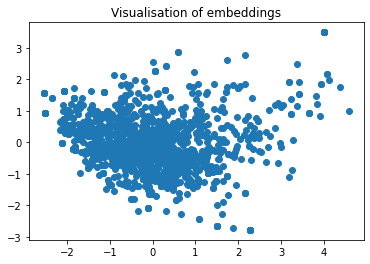

In [53]:
ac.plot_arguments(df_arguments["glove"], just_plot=True)

#### Plot embeddings, colour according to the cluster

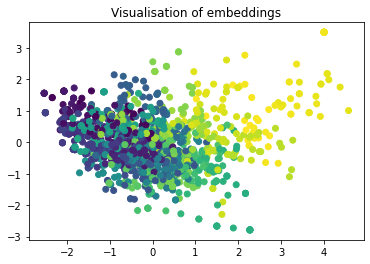

In [54]:
ac.plot_arguments(df_arguments["glove"], clusters=df_arguments["cluster"], just_plot=True)

#### Plot embeddings, colour according to the cluster, annotated by Name

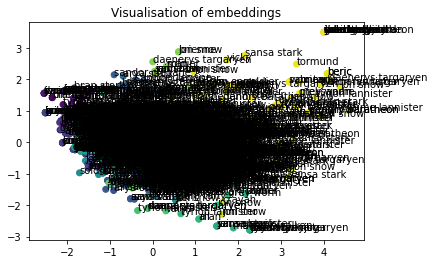

In [56]:
ac.plot_arguments(df_arguments["glove"], clusters=df_arguments["cluster"], annotations=df_arguments["Name"], just_plot=True)